# Data Mining Project


### Task:

*   You are provided with a dataset named **final_cloth**. This collection contains information and feedback about two clothing stores. You have been asked to analyze and process the necessary data on this data set and answer your question.

 *1) Describe the data set information.*
 
 *2) Check if the dataset has missing values. In which columns are these values placed? Also, while stating the reason, deal with the missing values in the best way in your opinion.*
 
 *3) Draw a BoxPlot diagram for numerical features.*
 
 *4) Draw a distribution diagram for at least 3 features.*
 
 *5) Draw the category diagram based on feedback-length so that the frequency of each feedback in each category is known. 
 (The final diagram should be in the form of the diagram below, the numbers are only examples and are not correct.)*
 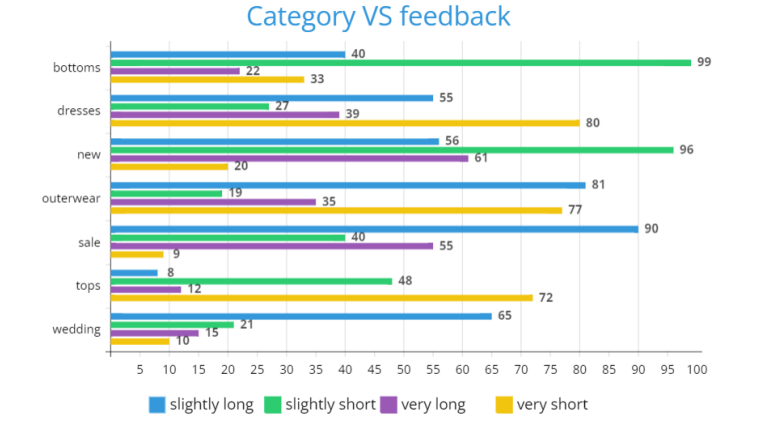

Hints: 
*    Using pandas and the json_read() function, the content of your file will be converted into a pandas dataframe.

*     The id_item attribute specifies the type of product. The rest of the features indicate the size or specifications of the buyer or his opinion about the purchase.

*     The distribution chart for categorical data is the same as the histogram chart.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a>
            <ul>
                <li><a href="#json">Load Data From Json File</a></li>
                <li><a href="#dataFrame">Make DataFrame from DataSet</a></li>
            </ul>
        </li>
        <li><a href="#information">DataSet Information</a></li>
            <ul>
          <li><a href="#type_count">Data types and counts of not-null values for all features</a></li>
          <li><a href="#size">Size of dataSet</a></li>
          <li><a href="#statistical">Basic statistical summaries of numerical attributes</a></li>
          <li><a href="#null-value">Count of null-values for each attribute</a></li>
            </ul>
        <li><a href="#missing_value">Missing Values Management</a>
             <ul>
          <li><a href="#manage-numerical"> Manage numerical values</a></li>
          <li><a href="#manage-non-numerical"> Manage non-numerical values</a></li>
            </ul>
        </li>
        <li><a href="#boxplot">Draw Boxplot</a></li>
        <li><a href="#distribution_plot">Draw Distribution Plot</a></li>
        <li><a href="#category_diagram">Category diagram based on feedback-length</a></li>
    </ol>
</div>
<br>
<hr>

# Import Libraries
Import the Following Libraries:

<ul>
    <li> <b>pandas ( as pd )</b>: fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language </li>
    <br/>
    <li> <b>numpy ( as np )</b>: The fundamental package for scientific computing with Python </li>
    <br/>
    <li> <b>json </b>: Used to work with JSON data </li>
    <br/>
    <li> <b>mtplotlib.pyplot ( as plt )</b>: Comprehensive library for creating static, animated, and interactive visualizations in Python </li>
    <br/>
    <li> <b>seaborn ( as sns )</b>: Python data visualization library based on matplotlib </li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

<div id="about_dataset">
    <h2>About the dataset</h2>
As mentioned above,data set contains information and feedback about two clothing stores. Each of these feedbacks contains only some specific features which may not be in others. In addition, each of them has unique user_id whitch it associate to particularly user.
    
    
We want to do some preprocessing activities and get some statistical information from dataset. Furthermore, we want to find the relation and some other information from this data set by visualizing in different models.
</div>

<div id="json">
    <h2>Load Data From Json File</h2>
</div>

This data give as json format from my teacher but this is not an actual json, it's like a text format whitch it contains some json in each line. Thus, we should read line by line in which each line related to each of feedbacks that we discussed earlier.

*In fact a tiny part of dataset like this:*
```json
{"item_id": "123373", "waist": "29", "size": 7, "quality": 5, "cup size": "d", "hips": "38", "bra size": "34", "category": "new", "bust": "36", "height": "5ft 6in", "user_name": "Emily", "length": "just right", "fit": "small", "user_id": "991571"}
{"item_id": "123373", "waist": "31", "size": 13, "quality": 3, "cup size": "b", "hips": "30", "bra size": "36", "category": "new", "length": "just right", "height": "5ft 2in", "user_name": "sydneybraden2001", "fit": "small", "user_id": "587883"}
{"item_id": "123373", "waist": "30", "size": 7, "quality": 2, "cup size": "b", "shoe size": "9.00", "bra size": "32", "category": "new", "length": "slightly long", "height": "5ft 7in", "user_name": "Ugggh", "fit": "small", "user_id": "395665"}
```

If we read line by line from this data set, each of them returned as a string, so we should change it to a json format to make a data frame later using this jsons.

In [2]:
# If we want to read a file in notebook, we should find full path of considered file from our pc.
source='cloth_final_data.json'
# We read line by line from the file given as an input
with open(source) as file:
    records=file.readlines()
# We convert each string line we read before to the json format
records=[json.loads(record) for record in records]
# Print the first record of data that we converted to json format
records[0]

{'item_id': '123373',
 'waist': '29',
 'size': 7,
 'quality': 5,
 'cup size': 'd',
 'hips': '38',
 'bra size': '34',
 'category': 'new',
 'bust': '36',
 'height': '5ft 6in',
 'user_name': 'Emily',
 'length': 'just right',
 'fit': 'small',
 'user_id': '991571'}

<div id="dataFrame">
    <h2>Make DataFrame from DataSet</h2>
    <p>Now, we want to make a pandas dataframe to work with it in the whole process of this exercise.</p>
    <p><b>First of all, we should recognise our features of data set which belong to the column of our data frame. As we discussed before, each record may not has the same keys like others, so we should gather them and set of these keys make our features of data frame.</b></p>
    <p>For instance:</p>
</div>

``` python
    record1 = {"item_id": "123373", "waist": "29", "size": 7}
    record2 = {"item_id": "123373", "category": "new", "size": 21}
    # Our features should be the union of the keys of 2 dictionaries.
    features=["item_id","waist","size","category"]
```
**After that, by using `pd.DataFrame`, we pass our records and also we pass the features to this function to make our data frame.**

In [3]:
features=[]
# Make features list by adding keys of each record
for record in records:
    for key,value in record.items():
        features.append(key)
# Make data frame by passing records and features of our DataSet
dataFrame=pd.DataFrame(records,columns=set(features))
# Now, we can show the first records of our data set
# The default value of head() shows the first 5 records
dataFrame.head()

,waist,hips,bra size,item_id,length,height,size,quality,user_id,shoe width,bust,category,cup size,review_summary,user_name,review_text,fit,shoe size
0,29,38,34,123373,just right,5ft 6in,7,5.0,991571,NaN,36,new,d,NaN,Emily,NaN,small,NaN
1,31,30,36,123373,just right,5ft 2in,13,3.0,587883,NaN,NaN,new,b,NaN,sydneybraden2001,NaN,small,NaN
2,30,NaN,32,123373,slightly long,5ft 7in,7,2.0,395665,NaN,NaN,new,b,NaN,Ugggh,NaN,small,9.00
3,NaN,NaN,NaN,123373,just right,NaN,21,5.0,875643,NaN,NaN,new,dd/e,NaN,alexmeyer626,NaN,fit,NaN
4,NaN,NaN,36,123373,slightly long,5ft 2in,18,5.0,944840,NaN,NaN,new,b,NaN,dberrones1,NaN,small,NaN


<div id="information">
    <h2>DataSet Information</h2>
    <b>In this section, we want describe our data set completely.</b>
</div>

<div id="type_count">
    <h2>Data types and counts of not-null values for all features</h2>
</div>
In this subsection, the features of our dataset can be seen, and for each feature, the number of non-null values and the type of that feature are shown.

In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   waist           2882 non-null   object 
 1   hips            56064 non-null  object 
 2   bra size        76772 non-null  object 
 3   item_id         82790 non-null  object 
 4   length          82755 non-null  object 
 5   height          81683 non-null  object 
 6   size            82790 non-null  int64  
 7   quality         82722 non-null  float64
 8   user_id         82790 non-null  object 
 9   shoe width      18607 non-null  object 
 10  bust            11854 non-null  object 
 11  category        82790 non-null  object 
 12  cup size        76535 non-null  object 
 13  review_summary  76065 non-null  object 
 14  user_name       82790 non-null  object 
 15  review_text     76065 non-null  object 
 16  fit             82790 non-null  object 
 17  shoe size       27915 non-null 

<div id="size">
    <h2>Size of dataSet</h2>
    <p>In this subsection, we want to know that how many rows and columns our data frame has.</p>
</div>

In [5]:
# 82790 rows & 18 columns
dataFrame.shape 

(82790, 18)

<div id="statistical">
    <h2>Basic statistical summaries of numerical attributes</h2>
    <p>In this subsection, we want to generate descriptive statistics.</p>
    <i>For instance:</i>
    <ul>
        <li><b>count:</b> Count number of non-NA/null observations.
            <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html#pandas.DataFrame.count'>More Information</a></li>
        <br/>
        <li><b>mean:</b> Mean of the values.
                    <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean'>More Information</a></li>
        <br/>
        <li><b>std:</b> Standard deviation of the observations.
                            <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html#pandas.DataFrame.stdmean'>More Information</a></li>
        <br/>
        <li><b>min:</b> Minimum of the values in the object.
                                    <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html#pandas.DataFrame.min'>More Information</a></li>
        <br/>
        <li><b>25%:</b> The lower percentile</li>
        <br/>
        <li><b>50%:</b> The 50 percentile is the same as the median.</li>
        <br/>
        <li><b>75%:</b> The upper percentile</li>
        <br/>
        <li><b>max:</b> Maximum of the values in the object.
                                            <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html#pandas.DataFrame.max'>More Information</a></li>
    </ul>
    <br/>
</div>

By calling `.describe()` method, we gather all of these parameters for our data frame.

For example:

  * In the *size* feature, up to 8 is 25% of the data, up to 12 is 50% and up to 15 is 75%. Its minimum value is 0 and its maximum value is 38. The average value is about 12.66 and their number is 82790 and its standard deviation is about 8.2.
    
  * In the *quality* feature, up to 3 is 25% of the data, up to 4 is 50% and up to 5 is 75%. Its minimum value is 1 and its maximum value is 5. The average value is about 3.94 and their number is 82722 and its standard deviation is about 099.


In [6]:
dataFrame.describe()

,size,quality
count,82790.000000,82722.000000
mean,12.661602,3.949058
std,8.271952,0.992783
min,0.000000,1.000000
25%,8.000000,3.000000
50%,12.000000,4.000000
75%,15.000000,5.000000
max,38.000000,5.000000


<div id="null_value">
    <h2>Count of null-values for each attribute</h2>
    <p>In this subsection, we want to find the count of null values for each of the features of our data frame.</p>
</div>

By calling `.isna()` for each value of dataFrame we get True for null-values and Flase for not-null-values, after that we should call `.sum()` to get the count of null-values for each attribute.

The *ID* feature of people has always been unique and it can be seen here that there is not-null value for it.

In [7]:
dataFrame.isna().sum()

waist             79908
hips              26726
bra size           6018
item_id               0
length               35
height             1107
size                  0
quality              68
user_id               0
shoe width        64183
bust              70936
category              0
cup size           6255
review_summary     6725
user_name             0
review_text        6725
fit                   0
shoe size         54875
dtype: int64

<div id="missing_value">
    <h2>Missing Values Management</h2>
    <p>In this section, we want to use some approaches to manage missing and outlier values.</p>
</div>

In [8]:
nullableItems=[]
# Series of all features that they have null values or not
nullSeries=dataFrame.isna().sum()>0
for item in nullSeries.iteritems(): 
    # Check this feature has null value to find nullable values
    if item[1]>0:
        nullableItems.append(item[0])
nullableItems

['waist',
 'hips',
 'bra size',
 'length',
 'height',
 'quality',
 'shoe width',
 'bust',
 'cup size',
 'review_summary',
 'review_text',
 'shoe size']

<div id="manage-numerical">
    <h2>Manage numerical values</h2>
    <p>In this subsection, we want to use some approaches to manage only numerical values of our dataFrame.</p>
    As we discussed before, each feedback has only some attributes which may other don't have. Thus, some records have null values for features that they don't have and being null-value for these columns are logical.
</div>

``` python
# Numerical values
['shoe size', 'shoe width', 'hips', 'cup size', 'height', 'waist', 'quality', 'bust', 'bra size', 'length']
```

In [9]:
numericalNullValues=nullableItems.copy()
numericalNullValues.remove('review_summary')
numericalNullValues.remove('review_text')
# Find numrical null values from all of the features that are nullable
# All of this feauturs are some of them belong to some staff and others belong to another ones.
print(numericalNullValues)

['waist', 'hips', 'bra size', 'length', 'height', 'quality', 'shoe width', 'bust', 'cup size', 'shoe size']


<div id="manage-non-numerical">
    <h2>Manage non-numerical values</h2>
    <p>In this subsection, we want to use some approaches to manage only non-numerical values of our dataFrame.</p>
 </div>

**1) review_text:** For users who have not submitted a feedback, we consider a blank value.

**2) review_summary:** For items without any description, we consider blank value for them.

In [10]:
dataFrame['review_text'].fillna('',inplace=True)
dataFrame['review_summary'].fillna('',inplace=True)
# New DataFrame by replacing blacnk value for 2 features such as `review-text` & `review-summary`
dataFrame.head()

,waist,hips,bra size,item_id,length,height,size,quality,user_id,shoe width,bust,category,cup size,review_summary,user_name,review_text,fit,shoe size
0,29,38,34,123373,just right,5ft 6in,7,5.0,991571,NaN,36,new,d,,Emily,,small,NaN
1,31,30,36,123373,just right,5ft 2in,13,3.0,587883,NaN,NaN,new,b,,sydneybraden2001,,small,NaN
2,30,NaN,32,123373,slightly long,5ft 7in,7,2.0,395665,NaN,NaN,new,b,,Ugggh,,small,9.00
3,NaN,NaN,NaN,123373,just right,NaN,21,5.0,875643,NaN,NaN,new,dd/e,,alexmeyer626,,fit,NaN
4,NaN,NaN,36,123373,slightly long,5ft 2in,18,5.0,944840,NaN,NaN,new,b,,dberrones1,,small,NaN


<div id="boxplot">
    <h2>Draw Boxplot</h2>
    <p>In this section, we want to consider some numerical features and draw boxplot for each of them.</p>
 </div>
 
   To draw boxplot, we use `.boxplot` which it get some parameters to draw and the necessary value we should pass is our array of values for specific numerical feature. By using this method ( `matplotlib.pyplot.boxplot(x, notch=None,...)` ), we make a box and whisker plot for each column of x or each vector in sequence x. The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Flier points are those past the end of the whiskers. <a href='https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html'>For more Information</a>
   
   
We want to show some plots, so we use `.subplots` to recognise that we have 6 plots with 3 columns and 2 rows. This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call. The structure of this method like this: `matplotlib.pyplot.subplots(nrows=1, ncols=1, *,...)`<a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html'> For more information</a>

For example:

* Regarding the *size* feature, the minimum value is 0, the first quartile is approximately 8, the median is approximately 12, the third quartile is approximately 15, and the maximum value is approximately 25. Also, the number of miss data is 7.

* Regarding the *shoe size* feature, the minimum value is 5, the first quartile is approximately 7, the median is approximately 8, the third quartile is approximately 9, and the maximum value is approximately 12. Also, the number of miss data is 1.

Text(0.5, 0.98, 'BoxPlot')

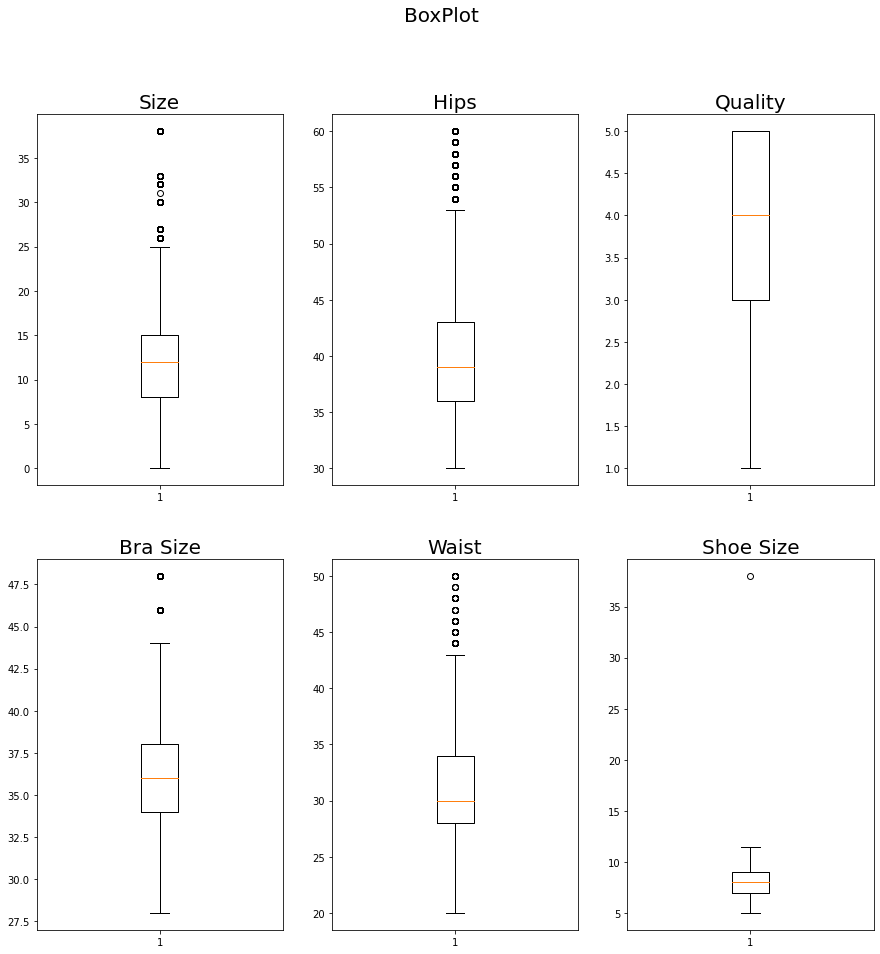

In [11]:
# 2 rows & 3 columns & width=15 & height=15
f, axes = plt.subplots(2, 3,figsize=(15,15))

# In the first row and first column we draw boxplot for the feature 'size'
axes[0][0].boxplot(dataFrame['size'])
# Set title 'Size' with font size of 20
axes[0][0].set_title('Size',fontsize=20)
#------------------
# Remove all null values for the feature 'hips'
hips_records=dataFrame['hips'].dropna(axis=0)
# Convert all values to float data type
hips_records=hips_records.astype(float)
# In the first row and second column we draw boxplot for the feature 'hips'
axes[0][1].boxplot(hips_records)
# Set title 'Hips' with font size of 20
axes[0][1].set_title('Hips',fontsize=20)
#------------------
# Remove all null values for the feature 'quality'
quality_records=dataFrame['quality'].dropna(axis=0)
# In the first row and third column we draw boxplot for the feature 'quality'
axes[0][2].boxplot(quality_records)
# Set title 'Quality' with font size of 20
axes[0][2].set_title('Quality',fontsize=20)
#------------------
# Remove all null values for the feature 'bra size'
braSize_records=dataFrame['bra size'].dropna(axis=0)
# Convert all values to int data type
braSize_records=braSize_records.astype(int)
# In the second row and first column we draw boxplot for the feature 'bra size'
axes[1][0].boxplot(braSize_records)
# Set title 'Bra Size' with font size of 20
axes[1][0].set_title('Bra Size',fontsize=20)
#------------------
# Remove all null values for the feature 'waist'
waist_records=dataFrame['waist'].dropna(axis=0)
# Convert all values to int data type
waist_records=waist_records.astype(int)
# In the second row and second column we draw boxplot for the feature 'waist'
axes[1][1].boxplot(waist_records)
# Set title 'Waist' with font size of 20
axes[1][1].set_title('Waist',fontsize=20)
#------------------
# Remove all null values for the feature 'shoe size'
shoeSize_records=dataFrame['shoe size'].dropna(axis=0)
# Convert all values to float data type
shoeSize_records=shoeSize_records.astype(float)
# In the second row and third column we draw boxplot for the feature 'shoe size'
axes[1][2].boxplot(shoeSize_records)
# Set title 'Shoe Size' with font size of 20
axes[1][2].set_title('Shoe Size',fontsize=20)

# Set title for the whole figure which is named 'BoxPlot' with font size of 20
f.suptitle("BoxPlot",fontsize=20)


<div id="distribution_plot">
    <h2>Draw Distribution Plot</h2>
    <p>In this section, we want to consider some categorical features and draw boxplot for each of them.</p>
 </div>
 
We want to show some plots, so we use `.subplots` to recognise that we have 6 plots with 3 columns and 2 rows. This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call. The structure of this method like this: `matplotlib.pyplot.subplots(nrows=1, ncols=1, *,...)`<a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html'> For more information</a>

To draw distribution plot(histogram), we use `seaborn.histplot(data=None, *, x=None, y=None,...)` which it get some parameters to draw and the necessary value we should pass is our array of values for specific categorical feature and recognise position of each plot. <a href='https://seaborn.pydata.org/generated/seaborn.histplot.html'>For more information</a>

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.Plot univariate or bivariate histograms to show distributions of datasets.

*Note:* We import seabors as sns.

**Categorical values:**
*        "fit" : small | fit | large
*        "length" : just right | slightly long | slightly short | very long | very short
*        "quality" : 1.0 | 2.0 | 3.0 | 4.0 | 5.0
*        "category" : new | tops | dresses | bottoms | outerwear | sale | wedding
*        "cup size" : c | d | dd/e | ddd/f | a | dddd/g | h | aa | j | i | k
*        "shoe size" : '8.50' | '8.00' | '7.50' | '9.00' | '7.00' | '10.00' | '6.50' | '9.50' | '6.00',
       '11.00' | '5.50' | '10.50' | '5.00' | '11.50' | '38'
       
Minimum & Maximum quatity for each category:
 1) Fit : Min (small / large) & Max (fit)
 2) length : Min (very short) & Max (just right)
 3) quality : Min (1) & Max (5)
 4) category : Min (wedding) & Max (new)
 5) cup size : Min (i / j / k) & Max (c)
 6) shoe size : Min (38) & Max (8.5)

fit  =>  Index(['fit', 'large', 'small'], dtype='object')
length  =>  Index(['just right', 'slightly long', 'slightly short', 'very long',
       'very short'],
      dtype='object')
quality  =>  Float64Index([5.0, 4.0, 3.0, 2.0, 1.0], dtype='float64')
category  =>  Index(['new', 'tops', 'dresses', 'bottoms', 'outerwear', 'sale', 'wedding'], dtype='object')
cup size  =>  Index(['c', 'd', 'b', 'dd/e', 'ddd/f', 'a', 'dddd/g', 'h', 'aa', 'j', 'i',
       'k'],
      dtype='object')
shoe size  =>  Index(['8.50', '8.00', '7.50', '9.00', '7.00', '10.00', '6.50', '9.50', '6.00',
       '11.00', '5.50', '10.50', '5.00', '11.50', '38'],
      dtype='object')


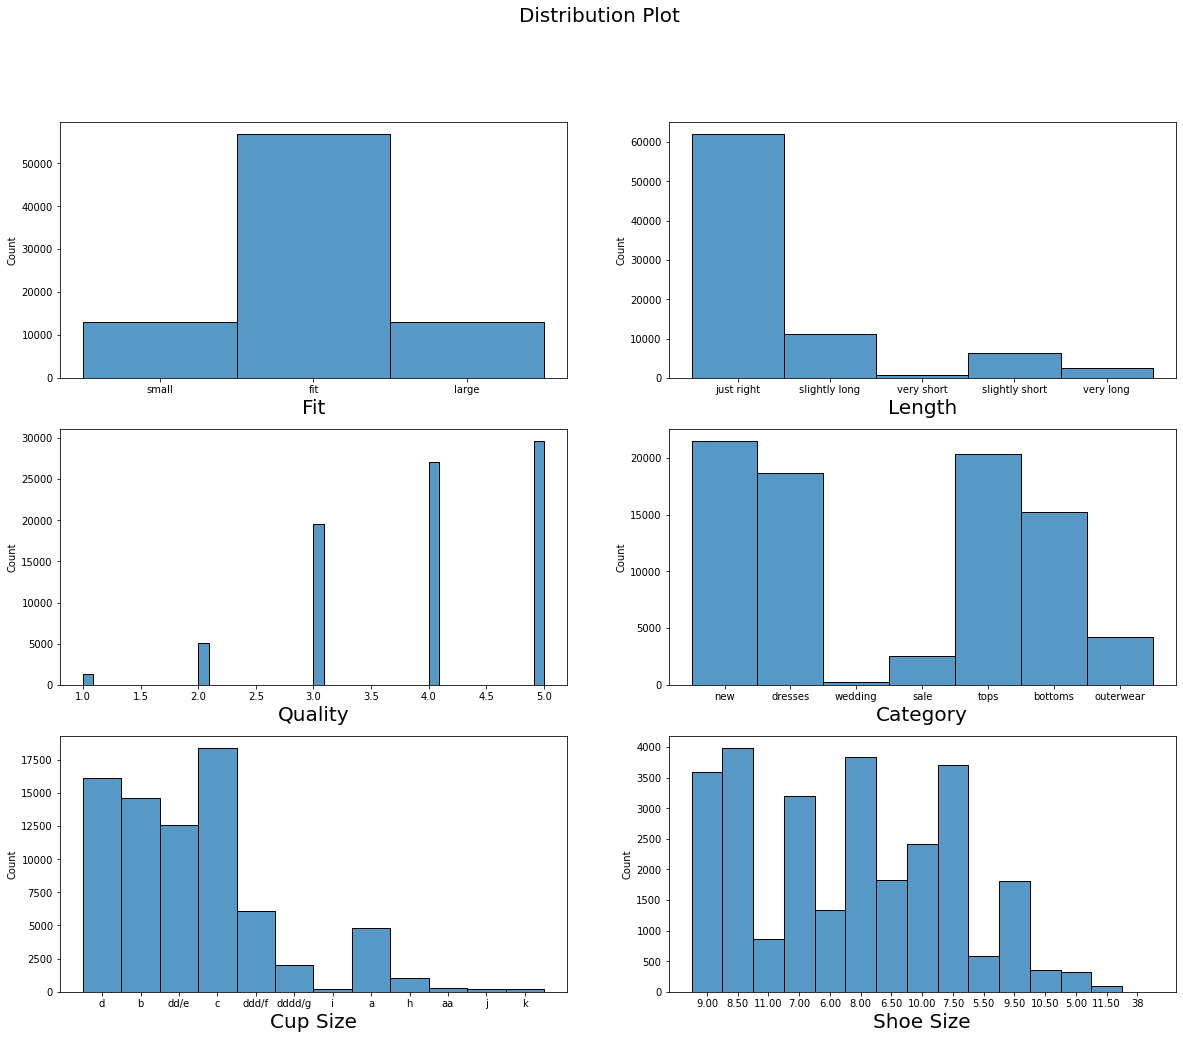

In [12]:
# 3 rows & 2 columns & width=20 & height=16
f, axes = plt.subplots(3, 2,figsize=(20,16))
# In the first row and first column we draw histplot for the feature 'fit'
sns.histplot(data=dataFrame['fit'],ax=axes[0][0])
# Set title 'Fit' with font size of 20
axes[0][0].set_xlabel('Fit',fontsize=20)
#------------------
# In the first row and second column we draw histplot for the feature 'length'
sns.histplot(data=dataFrame['length'],ax=axes[0][1])
# Set title 'Length' with font size of 20
axes[0][1].set_xlabel('Length',fontsize=20)
#------------------
# In the second row and first column we draw histplot for the feature 'quality'
sns.histplot(data=dataFrame['quality'],ax=axes[1][0])
# Set title 'Quality' with font size of 20
axes[1][0].set_xlabel('Quality',fontsize=20)
#------------------
# In the second row and second column we draw histplot for the feature 'category'
sns.histplot(data=dataFrame['category'],ax=axes[1][1])
# Set title 'Category' with font size of 20
axes[1][1].set_xlabel('Category',fontsize=20)
#------------------
# In the third row and first column we draw histplot for the feature 'cup size'
sns.histplot(data=dataFrame['cup size'],ax=axes[2][0])
# Set title 'Cup Size' with font size of 20
axes[2][0].set_xlabel('Cup Size',fontsize=20)
#------------------
# In the third row and second column we draw histplot for the feature 'shoe size'
sns.histplot(data=dataFrame['shoe size'],ax=axes[2][1])
# Set title 'Shoe Size' with font size of 20
axes[2][1].set_xlabel('Shoe Size',fontsize=20)

# Set title for the whole figure which is named 'Distribution Plot' with font size of 20
f.suptitle("Distribution Plot",fontsize=20)
categoricalValues={}
categoricalFeatures=['fit','length','quality','category','cup size' ,'shoe size']
for item in categoricalFeatures:   
    print(item, ' => ', dataFrame[item].value_counts().index)

<div id="category_diagram">
    <h2>Category diagram based on feedback-length</h2>
    <p>In this section, we want to draw a kind of bar chart with
    grouped by each category and the value of each bar associated to the count of each length.
    </p>
 </div>
The steps of this section:

1) First of all,By using this command `pd.crosstab(feature1,feature2)`, we should make a new data frame which is cross tab of 2 features such as category and length and the values are the count of records that have both of this specific features. This method by default computes a frequency table of the factors unless an array of values and an aggregation function are passed. <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html'> For more information</a>

The result is like this:
```
length     just right  slightly long  slightly short  very long  very short
category                                                                   
bottoms         10379           3326             690        732         129
dresses         14429           1702            2016        260         233
new             16502           2489            1689        623         179
outerwear        3496            358             297         49          21
sale             1931            326             185         38          39
tops            14981           3039            1415        726         201
wedding           226             21              27          0           1
```
2) To add some gap between rectangles for each caategory we define gap variable. `gap=0.05`

3) We draw an empty plot. `plt.subplots()`

4) We should separate the row to same length sections, so based on the count of lengths (one of the features) we should recognise some points and the gap before and after that(e.g. 0.3) to make our plots. By using `np.linspace` we separate the length to the same length parts.<a href='https://numpy.org/doc/stable/reference/generated/numpy.linspace.html'> For more information </a>

5) By subtracting 2 continious points of each reactangle, we get width for them , **but** we subtract gap the show them better.

6) Iterate on all lengths that we have, to make bar chart for each of them and in each loop e draw for all 7 categories. We use this method `DataFrame.plot.bar(x=None, y=None, **kwargs)` <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html'> For more information </a>

The x value we pass as an argument for the first category => 
```
[-0.3  0.7  1.7  2.7  3.7  4.7  5.7]
```
The height value we pass as an argument for the first category => 
```
[10379 14429 16502  3496  1931 14981   226]
```

What is bar chart? A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

7) At last, we add title and labels for both x & y.
For more information:
*         <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html'>axes.Axes.set_xlabel</a>
*         <a href='https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html'>axes.Axes.set_ylabel</a>
*         <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html'>axes.Axes.set_title</a>
*         <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html'>axes.Axes.set_xticks</a>
*         <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html'>axes.Axes.legend</a>

Maximum & Minimum feedbacks for each category:
1) bottoms: Max(just right => 10379) & Min(very short => 129)

2) dresses: Max(just right => 14429) & Min(very short => 233)

3) new: Max(just right => 16502) & Min(very short => 179)

4) outerwear: Max(just right => 3496) & Min(very short => 21)

5) sale: Max(just right =>1931 ) & Min(very long => 38)

6) tops: Max(just right => 14981) & Min(very short => 201)

7) wedding: Max(just right => 226) & Min(very long => 0)

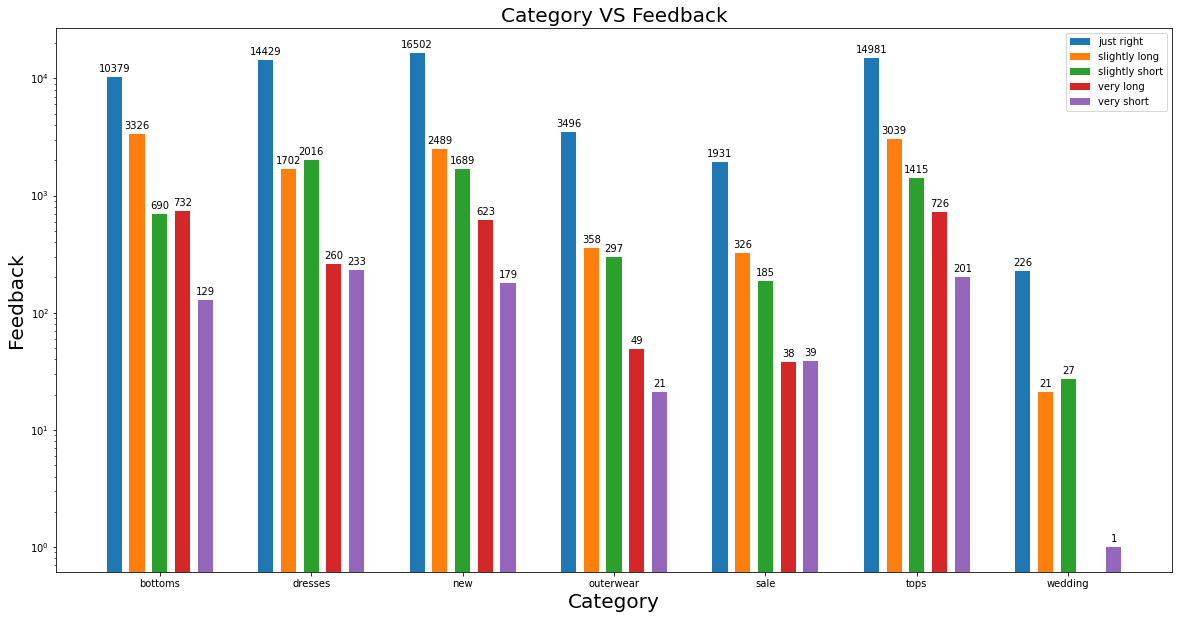

In [13]:
# Make a crosstab between these 2 features that we want to make particular barchart
newDataset=pd.crosstab(dataFrame['category'],dataFrame['length'])
# Get list of categories : ['bottoms', 'dresses', 'new', 'outerwear', 'sale', 'tops', 'wedding']
categoryItems = newDataset.index
# Get list of lengths : ['just right', 'slightly long', 'slightly short', 'very long','very short']
lengthItems = newDataset.columns
# Add gap between each rectangle
gap=0.05
# Draw an empty plot with width=20 and height=10
fig, ax = plt.subplots(figsize=(20,10))
separatedLengths=[]
transpose_separatedLengths=[]
# Separate the recognised length to the same length parts
for index in range(len(categoryItems)):
    # np.linspace(start value, end value, number of points)
    separatedLengths.append(np.linspace(index-0.3,index+0.3,num=len(lengthItems)))
# Calculate the width of each rectangle
width=separatedLengths[0][1]-separatedLengths[0][0]
# Transpose the separatedLengths to pass to bar method to draw it
transpose_separatedLengths=np.column_stack((separatedLengths))
# Iterate on all lengths to draw barchart for them
for index,item in enumerate(lengthItems):
    # Draw bar chart and pass parameters that we discussed before
    rec=ax.bar(x=transpose_separatedLengths[index],height=np.asanyarray(newDataset[item]),width=width-gap, label=lengthItems[index],log=True)
    # Show label for each rectangle that shows the count
    ax.bar_label(rec, padding=3)
# Add Y label for chart with fontsize = 20
ax.set_ylabel('Feedback',fontsize=20)
# Add X label for chart with fontsize = 20
ax.set_xlabel('Category',fontsize=20)
# Add title for our chart
ax.set_title('Category VS Feedback',fontsize=20)
# Change name of xticks that we considered from 0 to length of categoryItems 
# Now we consider as the names of categoryItems
ax.set_xticks(np.arange(len(categoryItems)),categoryItems)
# Add hint for each rectangle by color and some hint table in top right of the chart
ax.legend()